In [1]:
import numpy as np
import pandas as pd
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re
import os
import csv

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv("/content/drive/MyDrive/all_kindle_review .csv")


In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [4]:
data.shape

(12000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      12000 non-null  int64 
 1   Unnamed: 0.1    12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         12000 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


In [6]:
data.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "helpful", "reviewTime", "reviewerID", "reviewerName", "unixReviewTime"], inplace= True)

In [7]:
data.head()

,asin,rating,reviewText,summary
0,B0033UV8HI,3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average
1,B002HJV4DE,5,Great short read. I didn't want to put it dow...,Terrific menage scenes!
2,B002ZG96I4,3,I'll start by saying this is the first of four...,Snapdragon Alley
3,B002QHWOEU,3,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy
4,B001A06VJ8,4,I did not expect this type of book to be in li...,Book


In [8]:
data = data.sample(10000)

In [9]:
data.describe()

,rating
count,10000.000000
mean,3.246000
std,1.420945
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [10]:
data.isnull().sum()

asin          0
rating        0
reviewText    0
summary       0
dtype: int64

In [11]:
data.shape

(10000, 4)

In [12]:
data["asin"].nunique()

1989

In [13]:
data["rating"].value_counts()

4    2501
5    2485
3    1674
1    1671
2    1669
Name: rating, dtype: int64

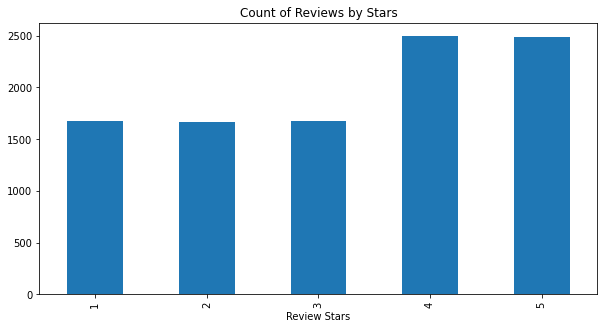

In [14]:
import matplotlib.pyplot as plt
ax = data["rating"].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

### Imputing rating value


In [15]:
data["rating"] = np.where((data["rating"] < 3), 0, data.rating)
data["rating"] = np.where((data["rating"] >= 3), 1, data.rating)

In [16]:
data

,asin,rating,reviewText,summary
6340,B001892DH0,1,When Sociology professor Meg visits a jungle i...,Treasure Hunting
5950,B002R2OF50,1,A nice and short book to read. End. That's the...,Hansel and Gretel
2310,B0014BRMKA,1,The traumatic meeting of Emerald Sandford and ...,Do Lord and Pirate's Daughters Mix?
1294,B003B3O310,0,"Sorry,but this was a disappointing read. Seem...",A Little Girl In My Room
9791,B001IWL1ZM,1,So amid all of the intentional spelling (tiger...,got a little trite (tryte)
...,...,...,...,...
2207,B001Q3KT1K,1,Look at the cover. Read the description. Thi...,DARK BUT LOVED
10675,B001AWYAZ8,1,This is a well written & very interesting acco...,A Moving Account
2035,B002G99RRK,1,I cant believe these books keep me up all nigh...,Look forward to each new one!
2701,B002FDLOCI,1,a good coming of age book and information that...,good western


In [17]:
data["word-count"] = data["reviewText"].str.split().str.len()

In [18]:
data

,asin,rating,reviewText,summary,word-count
6340,B001892DH0,1,When Sociology professor Meg visits a jungle i...,Treasure Hunting,113
5950,B002R2OF50,1,A nice and short book to read. End. That's the...,Hansel and Gretel,306
2310,B0014BRMKA,1,The traumatic meeting of Emerald Sandford and ...,Do Lord and Pirate's Daughters Mix?,424
1294,B003B3O310,0,"Sorry,but this was a disappointing read. Seem...",A Little Girl In My Room,23
9791,B001IWL1ZM,1,So amid all of the intentional spelling (tiger...,got a little trite (tryte),96
...,...,...,...,...,...
2207,B001Q3KT1K,1,Look at the cover. Read the description. Thi...,DARK BUT LOVED,53
10675,B001AWYAZ8,1,This is a well written & very interesting acco...,A Moving Account,39
2035,B002G99RRK,1,I cant believe these books keep me up all nigh...,Look forward to each new one!,44
2701,B002FDLOCI,1,a good coming of age book and information that...,good western,60


In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0.5, 1.0, 'Average no. of words vs rating')

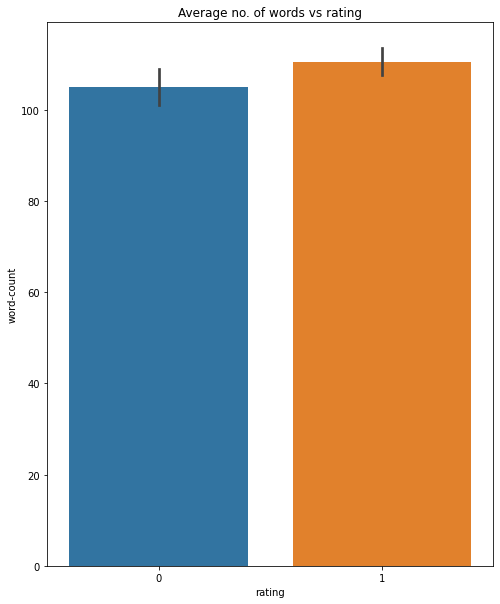

In [20]:
plt.figure(figsize=(8,10))
sns.barplot(x= "rating", y="word-count", data=data)
plt.title("Average no. of words vs rating")

In [21]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data ,test_size=0.2)

In [22]:
print(train.shape)
print(test.shape)

(8000, 5)
(2000, 5)


In [23]:
!pip install inflect
import inflect
import gensim
import string
p=inflect.engine()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [25]:
# Remove html tag
def clean_html(text):
    clean = re.compile("<.*?>")
    return re.sub(clean, '', text)

In [26]:
# COnvert to lowercase
def convert_lower(text):
    return text.lower()

In [27]:
# Remove square barckets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [28]:
# Remove special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [29]:
# Remove emails
def remove_emails(text):
    pattern=r"\S+@\S+"
    text=re.sub(pattern,'',text)
    return text

In [30]:
from nltk.tokenize.toktok import ToktokTokenizer

In [31]:
#set stopwords to english
stopword_list=nltk.corpus.stopwords.words('english')
stop=set(stopwords.words('english'))
tokenizer=ToktokTokenizer()
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


In [32]:
# Denoise the data
def denoise_text(text):
    text = clean_html(text)
    text = convert_lower(text)
    text = remove_between_square_brackets(text)
    text = remove_emoji(text)
    text = remove_special_characters(text)
    text = remove_emails(text)
    text = remove_stopwords(text)
    return text

In [33]:
data['reviewText']=data["reviewText"].apply(denoise_text)
data["reviewText"]

6340     sociology professor meg visits jungle south am...
5950     nice short book read end thats say depth book ...
2310     traumatic meeting emerald sandford asher welli...
1294     sorrybut disappointing read seemed like readin...
9791     amid intentional spelling tiger tygertygre bri...
                               ...                        
2207     look cover read description book brutal everyo...
10675    well written interesting accounting holocaust ...
2035     cant believe books keep night wonder nightmare...
2701     good coming age book information need know loo...
1030     didnt understand last book place adam enemy go...
Name: reviewText, Length: 10000, dtype: object

In [34]:
train["reviewText"] 

2965     I usually trust the reviews I read on the book...
2294     Wow! this was SHORT but as said in my note sec...
2588     Wow, the moment you sit down with this book it...
5040     "Heat of Passion" was a great short story. It'...
11934    Well another plus for Brenda  Jackson  with th...
                               ...                        
2168     Exciting story full of twists and turns. It re...
10069    I didn't even finish this. My idea of a good r...
7318     The chararacters weren't very developed.  The ...
3708     I actually like this. It was short but it kept...
3139     If you enjoy M/M action, then you may like thi...
Name: reviewText, Length: 8000, dtype: object

In [35]:
train["reviewText"] = train["reviewText"].apply(denoise_text)
train["reviewText"]

2965     usually trust reviews read books im interested...
2294     wow short said note section prequel given eboo...
2588     wow moment sit book pulls dont know interestin...
5040     heat passion great short story perfect filler ...
11934    well another plus brenda jackson westmoreland ...
                               ...                        
2168     exciting story full twists turns really showed...
10069    didnt even finish idea good read reading someo...
7318     chararacters werent developed side stiry horny...
3708     actually like short kept attention story flowe...
3139     enjoy mm action may like book much truely wish...
Name: reviewText, Length: 8000, dtype: object

In [36]:
test["reviewText"] = test["reviewText"].apply(denoise_text)
test["reviewText"]

6321    carly looking get away hectic life completely ...
1245    liked story liked nash thought stacy aiiight t...
991     wary reading bookas never read well written cr...
4752    book great start fades fast many grammatical s...
1188    serial currently available kindle novella cowr...
                              ...                        
4203    awful even free total waste time easy come fre...
4046    maybe didnt look hard spelling grammar problem...
374     glad info background characters series usual h...
8165    time sat write review realized couldnt even re...
6224    author hard time bringing storyand especially ...
Name: reviewText, Length: 2000, dtype: object

In [37]:
nltk.download("vader_lexicon")
from nltk.sentiment import SentimentIntensityAnalyzer
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [39]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [40]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    reviewText = row['reviewText']
    asin = row['asin']
    res[asin] = sia.polarity_scores(reviewText)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [41]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'asin'})
vaders = vaders.merge(data, how='left')
vaders.tail()

,asin,neg,neu,pos,compound,rating,reviewText,summary,word-count
9995,B002MPQ67M,0.129,0.717,0.154,0.2163,0,dialogue book tends rather simplistic book wou...,Dominatrix Murders,65
9996,B0044DEGIQ,0.288,0.471,0.241,0.0552,0,downloaded thinking something else might great...,wasn't for me,23
9997,B003LBSJ9O,0.000,0.662,0.338,0.8481,0,couldnt get book didnt grab attention beginnin...,Never finished it,52
9998,B0042P5D42,0.237,0.548,0.215,-0.1606,0,received book librarythings giveaway program l...,Needs serious editing,112
9999,B004HW6EY8,0.352,0.648,0.000,-0.8836,0,didnt understand last book place adam enemy go...,all over the place,43


In [42]:
vaders.shape

(10000, 9)

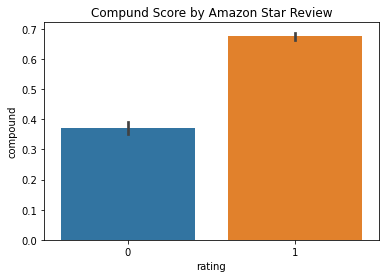

In [43]:
ax = sns.barplot(data=vaders, x="rating", y="compound")
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

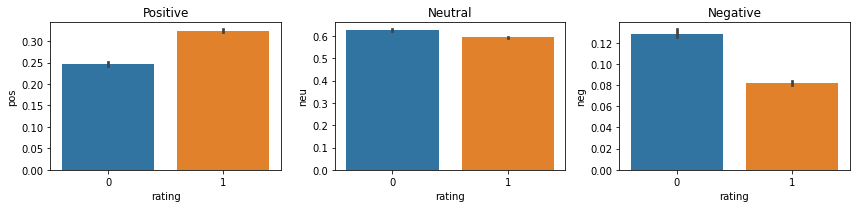

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x="rating", y='pos', ax=axs[0])
sns.barplot(data=vaders, x="rating", y='neu', ax=axs[1])
sns.barplot(data=vaders, x="rating", y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### Roberta Pretrained Model 

In [45]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [47]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [48]:
example = "This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [49]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9763551, 'roberta_neu': 0.020687476, 'roberta_pos': 0.0029573715}


In [50]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [51]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
      text = row['reviewText']
      asin = row['asin']
      res[asin] = polarity_scores_roberta(reviewText)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [52]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'asin'})
results_df = results_df.merge(vaders, how='left')

In [53]:
results_df.columns

Index(['asin', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'neg', 'neu',
       'pos', 'compound', 'rating', 'reviewText', 'summary', 'word-count'],
      dtype='object')

In [54]:
results_df.rename(columns = {'neg':'vader_neg', 'neu':'vader_neu',
                              'pos':'vader_pos'}, inplace = True)
results_df.columns

Index(['asin', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'vader_neg',
       'vader_neu', 'vader_pos', 'compound', 'rating', 'reviewText', 'summary',
       'word-count'],
      dtype='object')

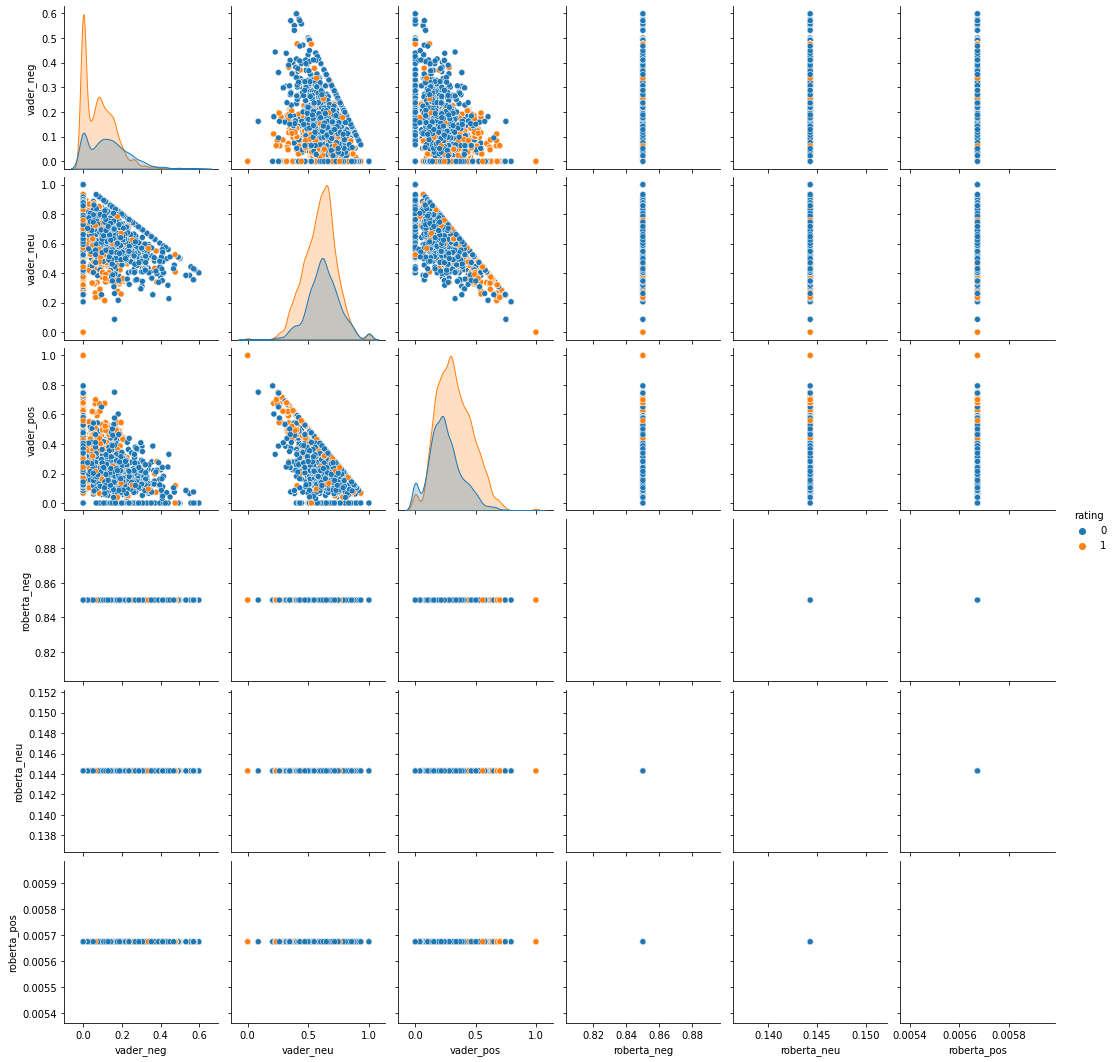

In [55]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

In [56]:
results_df.query('rating == 1') \
    .sort_values('roberta_pos', ascending=False)['reviewText'].values[0]

'sociology professor meg visits jungle south america looking ruins finds wounded jaguar hears local helpers running away next day finds scared turns wounded jaguar mansantiago knows human women kind dont mix helps save life starts falling hertreasure hunting nice little treasure indiana jones type action creepy bad guys hot strange love scenes sex tree story keeps interest way end treasure hunting thoroughly enjoyable readvivian'

In [57]:
results_df.query('rating == 1') \
    .sort_values('vader_pos', ascending=False)['reviewText'].values[0]

'enjoyed christmas romance kindle revisit anytime want reread'

In [58]:
results_df.query('rating == 0') \
    .sort_values('roberta_neg', ascending=False)['reviewText'].values[0]

'sorrybut disappointing read seemed like reading high school lit class assignment one stories surprised'

In [59]:
results_df.query('rating == 0') \
    .sort_values('vader_neg', ascending=False)['reviewText'].values[0]

'badly formatted grammatical errors towards end disliked jarring pov setting changes characterization weak boring'